## This is the first practical ML algorithm for most of you. Do not be overwhelmed or discouraged by the sheer extent of new concepts in this notebook. As mentioned in the class,  we will repeat almost all of these concepts almost on a daily basis until the end of the course.

# For now, just go through this notebook and try to practice.

~  Suhail

In [180]:
import pandas as pd

In [181]:
df = pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# EDA - Exploratory Data Analysis

#  Linearity

Check if the dependent features have a linear relationship with the target (mpg)

In [182]:
df.corr().mpg

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

Apparently, cyl, disp, hp and wt are highlt correlated with the target. Thus, only they will kept for Linear Regression.

In [183]:
df_linear = df.loc[:, ['cyl', 'disp', 'hp', 'wt', 'mpg']]
df_linear.head()

,cyl,disp,hp,wt,mpg
0,6,160.0,110,2.620,21.0
1,6,160.0,110,2.875,21.0
2,4,108.0,93,2.320,22.8
3,6,258.0,110,3.215,21.4
4,8,360.0,175,3.440,18.7


# Normality

It is a prerequisite of Linear Regression that the features be normal in nature (Gaussian Distribution).

Ideal normality is very scarce in real data but we can do if the skewness and kurtosis of the data is within the range of -1 to +1

In [184]:
from scipy import stats

In [185]:
print ('Skewness of cyl', stats.skew(df_linear.cyl))
print ('Kurtosis of cyl', stats.kurtosis(df_linear.cyl))

Skewness of cyl -0.18312865234479678
Kurtosis of cyl -1.6809684168130405


The Kurtosis of cyl is too high, we can remove this feature

In [186]:
print ('Skewness of hp', stats.skew(df_linear.hp))
print ('Kurtosis of hp', stats.kurtosis(df_linear.hp))

Skewness of hp 0.7614356361333623
Kurtosis of hp 0.05223272840399584


hp seems normally distributed

In [187]:
print ('Skewness of disp', stats.skew(df_linear.disp))
print ('Kurtosis of disp', stats.kurtosis(df_linear.disp))

Skewness of disp 0.40027244847286664
Kurtosis of disp -1.0896826570135087


disp seems normally distributed

In [188]:
print ('Skewness of wt', stats.skew(df_linear.wt))
print ('Kurtosis of wt', stats.kurtosis(df_linear.wt))

Skewness of wt 0.44378553550607736
Kurtosis of wt 0.1724705401587343


wt also seems normally distributed

### For linear regression, data needs to be normally distributed for good predictions, thus we only choose hp, disp and wt as predictors

In [189]:
df_normal =  df_linear.iloc[:, 1:]
df_normal.head()

,disp,hp,wt,mpg
0,160.0,110,2.620,21.0
1,160.0,110,2.875,21.0
2,108.0,93,2.320,22.8
3,258.0,110,3.215,21.4
4,360.0,175,3.440,18.7


# Low Colinearlity between predictors

The predictors must have low or no co dependence on each other. We can check which features hae high colinearity by checking the correlational table. If there is a strong correlation between two columns, one of them should be removed.

In [190]:
df_normal.corr()

,disp,hp,wt,mpg
disp,1.000000,0.790949,0.887980,-0.847551
hp,0.790949,1.000000,0.658748,-0.776168
wt,0.887980,0.658748,1.000000,-0.867659
mpg,-0.847551,-0.776168,-0.867659,1.000000


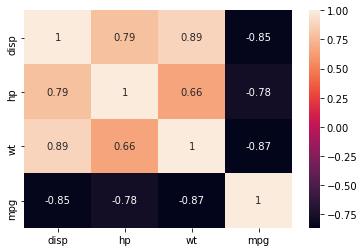

In [191]:
import seaborn as sb
%matplotlib inline 
sb.heatmap(df_normal.corr(), annot=True)

### wt and disp have a very high correlation of 0.89. Thus, removing disp (because disp has a weaker correlation with mpg as compaired with wt).

In [192]:
df_colin = df_normal.loc[:, ['hp', 'wt', 'mpg']]
df_colin.head()

,hp,wt,mpg
0,110,2.620,21.0
1,110,2.875,21.0
2,93,2.320,22.8
3,110,3.215,21.4
4,175,3.440,18.7


# Saperate out PREDICTORS and TARGET

In [193]:
X = df_colin.loc[:, ['hp', 'wt']]
y = df_colin.mpg

In [194]:
X.head()

,hp,wt
0,110,2.620
1,110,2.875
2,93,2.320
3,110,3.215
4,175,3.440


In [195]:
y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

# TRAIN TEST SPLIT

In [196]:
df_colin.shape

(32, 3)

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [198]:
X_train.shape

(25, 2)

In [199]:
X_test.shape

(7, 2)

In [200]:
X_train.head()

,hp,wt
19,65,1.835
16,230,5.345
7,62,3.190
21,150,3.520
18,52,1.615


In [201]:
y_train.head()

19    33.9
16    14.7
7     24.4
21    15.5
18    30.4
Name: mpg, dtype: float64

# Train Model

In [202]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [203]:
X_test

,hp,wt
17,66,2.200
2,93,2.320
27,113,1.513
10,123,3.440
4,175,3.440
22,150,3.435
6,245,3.570


In [204]:
y_test

17    32.4
2     22.8
27    30.4
10    17.8
4     18.7
22    15.2
6     14.3
Name: mpg, dtype: float64

In [205]:
y_predict = model.predict(X_test)
y_predict

array([26.17479733, 24.91275025, 27.11891294, 20.05119382, 18.43086688,
       19.22740036, 15.79387377])

In [206]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.7518393410692079

# Optimization / Outliers Removal

In [207]:
df_colin.head()

,hp,wt,mpg
0,110,2.620,21.0
1,110,2.875,21.0
2,93,2.320,22.8
3,110,3.215,21.4
4,175,3.440,18.7


In [208]:
import seaborn as sb

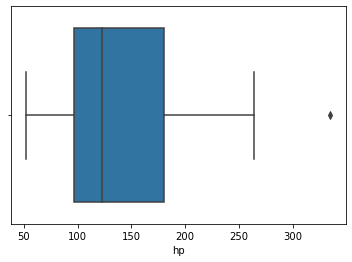

In [209]:
sb.boxplot(df_colin.hp)

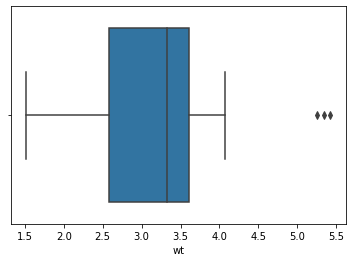

In [210]:
sb.boxplot(df_colin.wt)

## Remove outliers using quantiles

In [211]:
q = df_colin.hp.quantile(0.98)

In [212]:
test1 = df_colin[df_colin.hp <= q]

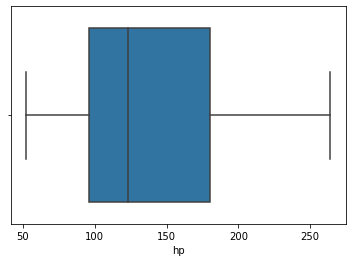

In [213]:
sb.boxplot(test1.hp)

In [214]:
q2 = test1.wt.quantile(0.93)
q2

5.132000000000002

In [215]:
test2 = test1[test1.wt <= q2]

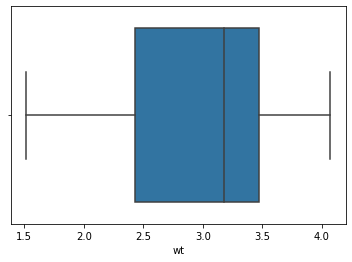

In [216]:
sb.boxplot(test2.wt)

In [217]:
test2.shape

(28, 3)

# Outliers have been removed

# Split out predictors and target

In [218]:
X = test2.loc[:, ['hp', 'wt']]
y = test2.mpg

# Do the train test split

In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Train the model

In [220]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

# Evaluate

In [221]:
y_predict = model.predict(X_test)
y_predict

array([19.45249021, 27.91402628, 19.92320459, 17.36359146, 27.21595448,
       14.05497103])

In [222]:
r2_score(y_test, y_predict)

0.8335492198815537